# Описательные статистики и картинки к первой задаче

## 1. Статистики

In [31]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

matplotlib.rcParams['figure.figsize'] = (20, 20)

In [32]:
all_data = pd.read_csv(
    'train_simple_reg.csv',
    index_col=0
)

In [48]:
all_X = all_data[['f1', 'f2', 'f3', 'f4', 'f5']]
all_y = all_data.y

In [40]:
all_data.dtypes

f1    float64
f2    float64
f3    float64
f4    float64
f5    float64
y     float64
dtype: object

In [41]:
all_data.shape

(4000, 6)

### Средне значения, отклонения, перцентили

In [42]:
all_data.describe()

,f1,f2,f3,f4,f5,y
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.009773,-0.013437,-0.017383,-0.011989,0.008937,-0.190108
std,1.008490,1.011113,0.980319,0.993674,1.015804,94.689478
min,-3.455834,-3.547137,-3.754190,-3.887955,-3.732773,-326.527918
25%,-0.688420,-0.700776,-0.684234,-0.669014,-0.674759,-62.352880
50%,-0.002872,0.000194,-0.017980,0.017253,0.014473,-0.895471
75%,0.707841,0.651141,0.626972,0.653673,0.699934,62.287918
max,4.099116,3.665123,3.326760,3.766540,3.707992,362.927510


In [43]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 6 columns):
f1    4000 non-null float64
f2    4000 non-null float64
f3    4000 non-null float64
f4    4000 non-null float64
f5    4000 non-null float64
y     4000 non-null float64
dtypes: float64(6)
memory usage: 218.8 KB


### Корреляционная матрица

In [44]:
all_data.corr()

,f1,f2,f3,f4,f5,y
f1,1.000000,-0.034764,-0.010736,0.022996,-0.003111,0.007139
f2,-0.034764,1.000000,-0.016981,0.031266,-0.003172,0.010214
f3,-0.010736,-0.016981,1.000000,0.012528,0.019732,0.206574
f4,0.022996,0.031266,0.012528,1.000000,0.008204,0.516542
f5,-0.003111,-0.003172,0.019732,0.008204,1.000000,0.840520
y,0.007139,0.010214,0.206574,0.516542,0.840520,1.000000


## 2. Визуализация

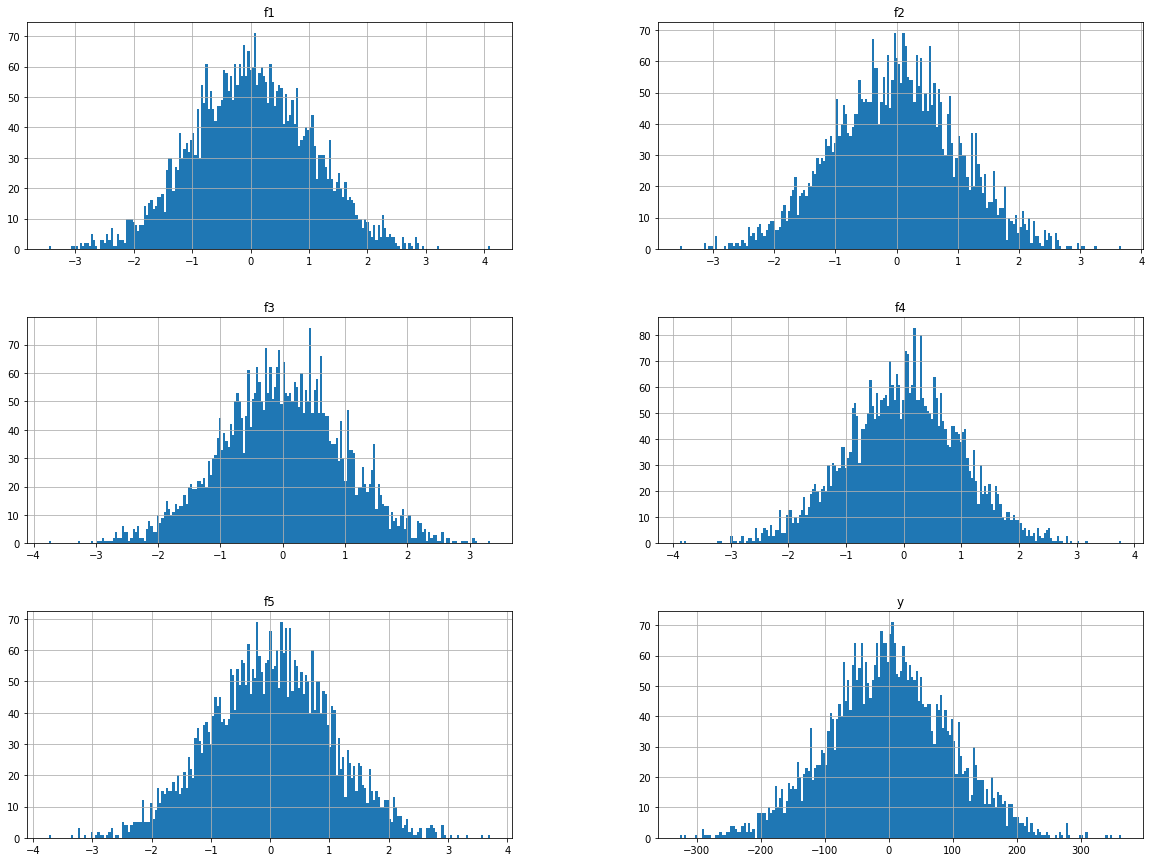

In [38]:
all_data.hist(bins=200,figsize=(20,15))
plt.show()

### Графики: каждый из признаков против целевой переменной

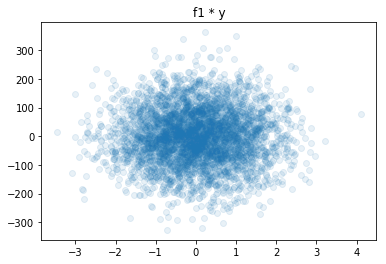

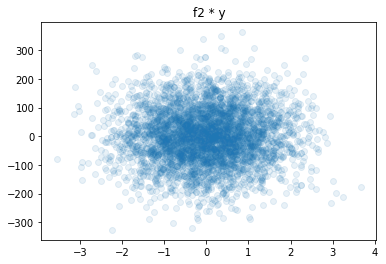

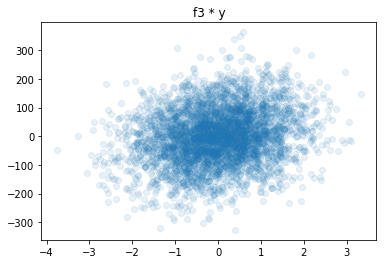

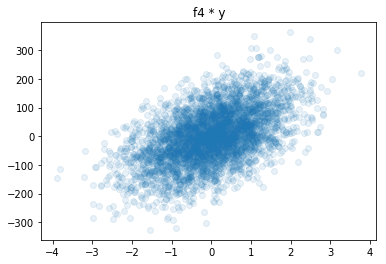

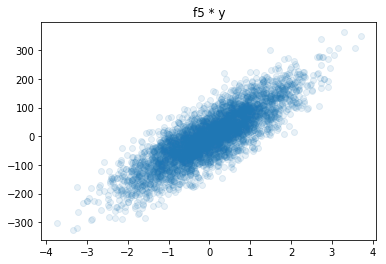

In [337]:
for col in ['f1', 'f2', 'f3', 'f4', 'f5']:
    plt.scatter(all_X[col], all_y, alpha=0.1)
    plt.title(f'{col} * y')
    plt.show()

/home/nike/.virtualenvs/m/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


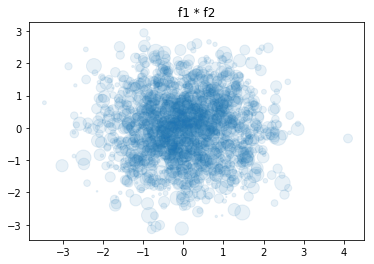

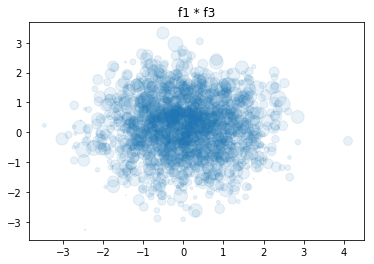

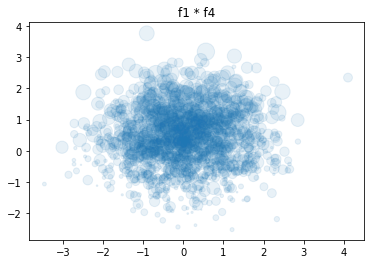

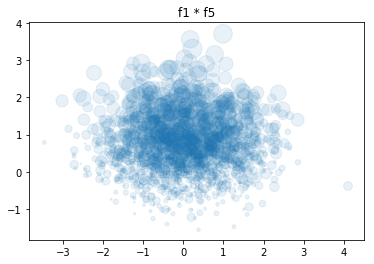

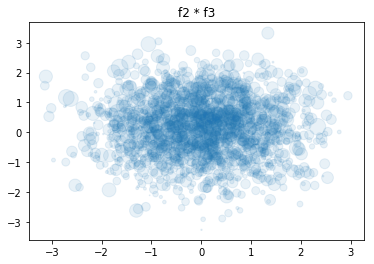

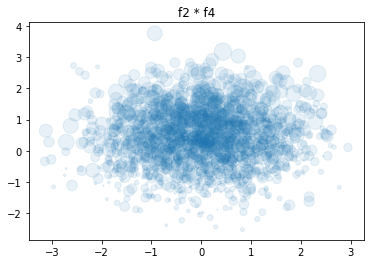

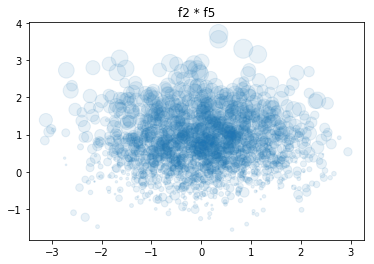

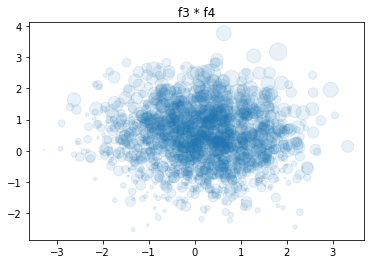

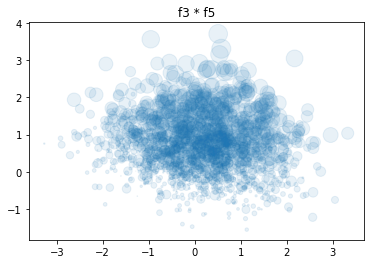

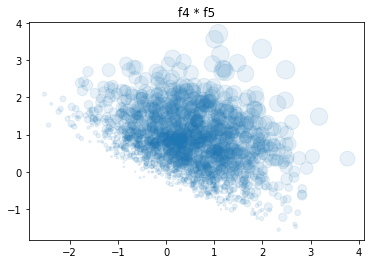

In [334]:
from itertools import combinations

# for col in ['f1', 'f2', 'f3', 'f4', 'f5']:
for coord_1, coord_2 in combinations(['f1', 'f2', 'f3', 'f4', 'f5'], 2):
    plt.scatter(all_X[coord_1], all_X[coord_2], alpha=0.1, s=all_y)
    plt.title(f'{coord_1} * {coord_2}')
    # plt.gray()
    plt.show()

### График: 2 главных компонента и величина целевого признака

См. [Вики: метод главных компонент](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(all_X)

/home/nike/.virtualenvs/m/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


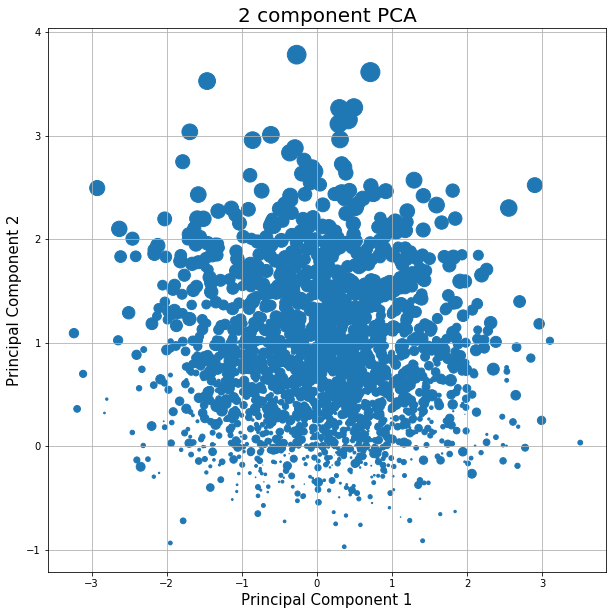

In [52]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(
    principalComponents[:,0],
    principalComponents[:,1],
    s=all_y
)

# plt.scatter(principalComponents[coord_1], all_X[coord_2], alpha=0.1, s=all_y)

ax.grid()